In [1]:
!pip install pandas matplotlib seaborn
# !pip install xgboost 
!pip install imbalanced-learn
# import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
                

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
df_hs = pd.read_csv("historical_sample.csv",sep=";", decimal=',')
print(df_hs.head(5))
df_bl = pd.read_csv("broker_list.csv",sep=";", decimal=',')
print(df_bl.head(5))

   Age  Gender  MarStat  Housing  Educ  Inc_Gr  Children         IQ  Client  \
0   18       0        4        2     3       3         1  61.280758     544   
1   23       0        1        1     3       3         1  72.224303     665   
2   25       0        1        2     3       3         1  86.556911    2692   
3   22       0        4        2     3       3         1  70.032964    3227   
4   25       0        4        2     3       3         1  81.056197    3491   

       rate cost_type  Default_flg  
0  0.052944       www            0  
1  0.052944       www            0  
2  0.052944       www            0  
3  0.052944       www            1  
4  0.052944       www            0  
   Age  Gender  MarStat  Housing  Educ  Inc_Gr  Children          IQ  rate  \
0   61       0        4        3     3       3         1  180.000000  0.05   
1   59       0        1        3     3       3         1  180.000000  0.05   
2   47       0        1        3     3       3         1  149.523682 

In [3]:
#DQ checks:
# Assuming df_hs is already defined, if not, load your DataFrame
# df_hs = pd.read_csv('your_file.csv')

# # 1. Check for Missing Values
# missing_values = df_hs.isnull().sum()
# print("Missing Values:\n", missing_values)

# # 2. Check for Duplicates
# duplicate_count = df_hs.duplicated().sum()
# print(f"\nNumber of Duplicate Rows: {duplicate_count}")

# # 3. Check Data Types
# data_types = df_hs.dtypes
# print("\nData Types:\n", data_types)

# # 4. Check for Outliers (using IQR method for numerical columns)
# numerical_cols = df_hs.select_dtypes(include=['float64', 'int64']).columns
# print("numerical_cols",numerical_cols)
# print("data type: ",numerical_cols.dtype)

## for col in numerical_cols:
#     Q1 = df_hs[col].quantile(0.25)
#     Q3 = df_hs[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df_hs[(df_hs[col] < lower_bound) | (df_hs[col] > upper_bound)]
#     print(f"\nOutliers in {col}:\n", outliers)

# # 5. Check for Unique Values in Categorical Columns
# categorical_cols = df_hs.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     unique_values = df_hs[col].unique()
#     print(f"\nUnique Values in {col}:\n", unique_values)

#6. Check for Consistency in Categorical Columns
#Example: Check for consistent casing in a specific column
# df_hs['your_categorical_column'] = df_hs['your_categorical_column'].str.lower()


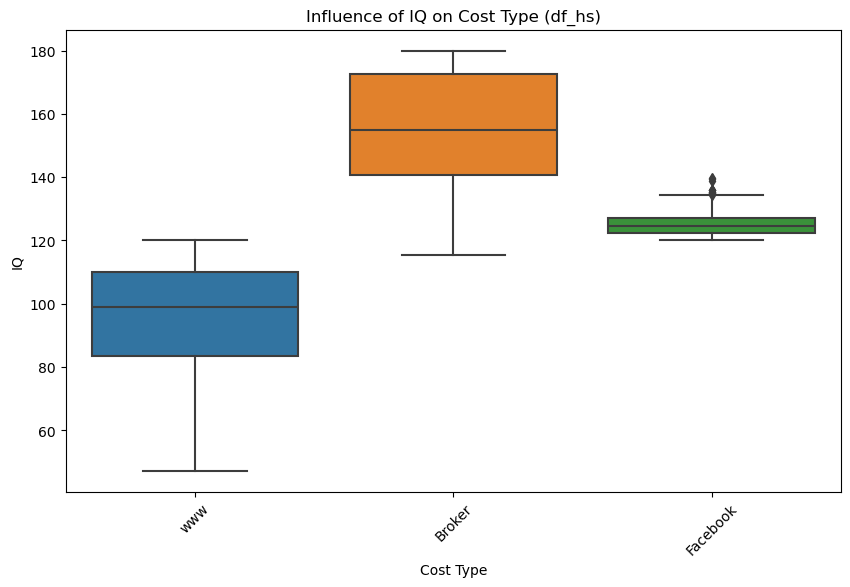

In [3]:
#plot based on df_hs
plt.figure(figsize=(10, 6))
sns.boxplot(x='cost_type', y='IQ', data=df_hs)
plt.title('Influence of IQ on Cost Type (df_hs)')
plt.xlabel('Cost Type')
plt.ylabel('IQ')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

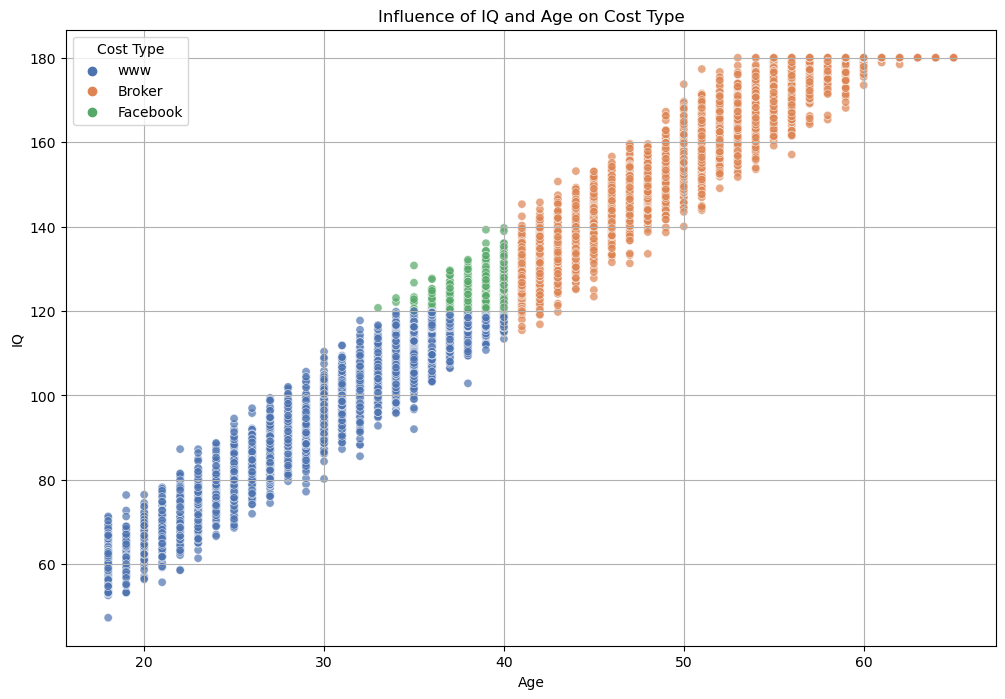

In [7]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='IQ', hue='cost_type', data=df_hs, palette='deep', alpha=0.7)

plt.title('Influence of IQ and Age on Cost Type')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.legend(title='Cost Type')
plt.grid(True)
plt.show()

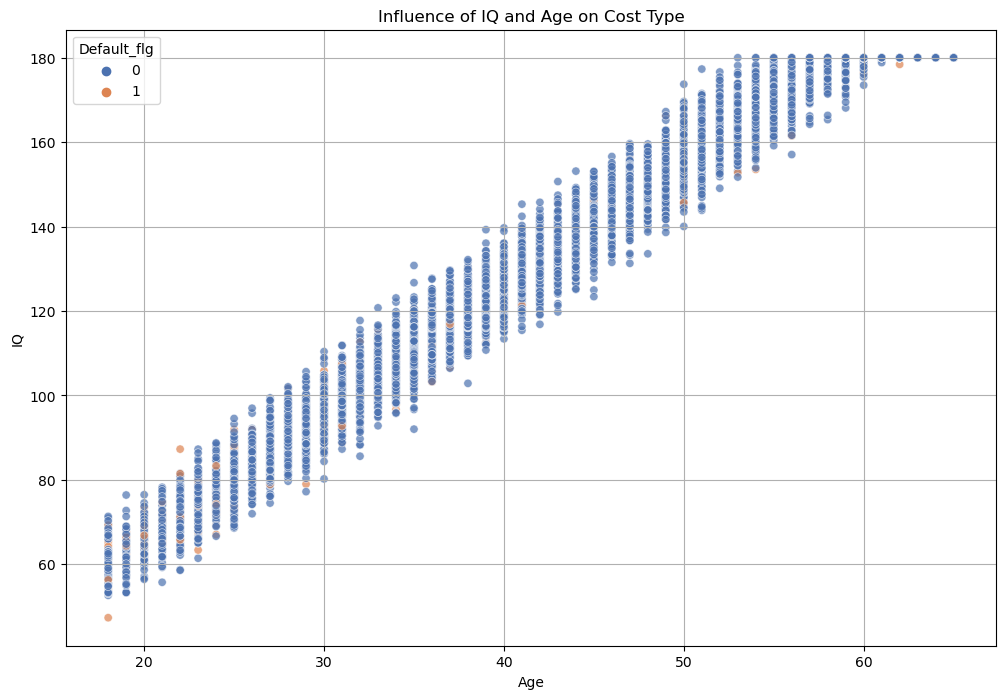

In [11]:
##additional for comparison with brokers data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='IQ', hue='Default_flg', data=df_hs, palette='deep', alpha=0.7)

plt.title('Influence of IQ and Age on Cost Type')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.legend(title='Default_flg')
plt.grid(True)
plt.show()

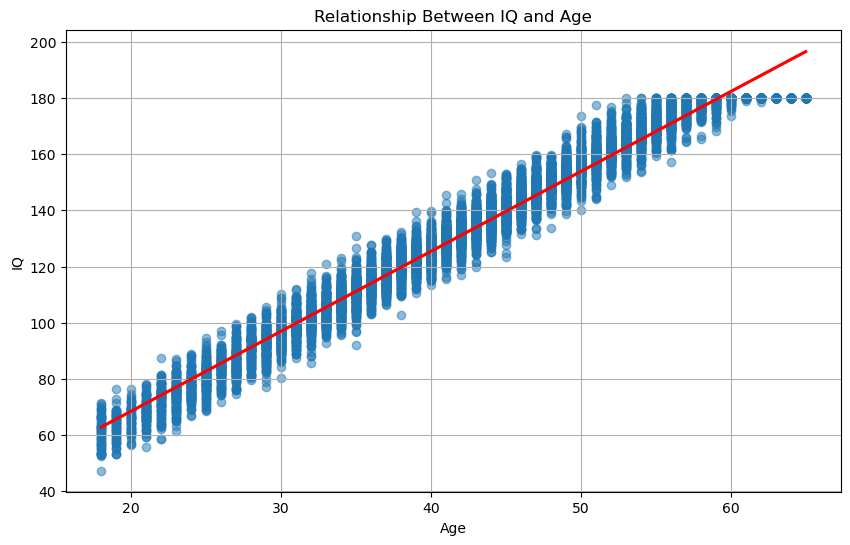

In [13]:
# Create a scatter plot to show the relationship between IQ and age
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='IQ', data=df_hs, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relationship Between IQ and Age')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.grid(True)
plt.show()

In [15]:
cnt_default_flag_1 = (df_hs["Default_flg"] == 1).sum()
print("Count of defaults: ",cnt_default_flag_1)
cnt_all = (df_hs["Default_flg"]).count()
print("Count of all items: ",cnt_all)
print("Default / all items = ",(cnt_default_flag_1/cnt_all))

Count of defaults:  530
Count of all items:  10000
Default / all items =  0.053


In [17]:
# Group by 'Inc_Gr' and calculate counts
count_default_flg_1 = df_hs[df_hs['Default_flg'] == 1].groupby('Inc_Gr').size()
count_default_flg_0_or_1 = df_hs[df_hs['Default_flg'].isin([0, 1])].groupby('Inc_Gr').size()
#print(count_default_flg_1,count_default_flg_0_or_1)
# Calculate the ratio
ratio = count_default_flg_1 / count_default_flg_0_or_1
#print(ratio)
#print(ratio[1])
# Convert to DataFrame for better readability
ratio_df = ratio.reset_index(name='Ratio')
print(ratio_df)


   Inc_Gr     Ratio
0       1  0.105991
1       2  0.086957
2       3  0.028491
3       4  0.020337


In [19]:
# LGD: own housing => "Housing"==3 0.2*30,000CZK*cnt_default_own_housing
df_hs_housing3_def1_agg_sum = df_hs[(df_hs["Housing"] == 3) & (df_hs["Default_flg"] == 1)].agg({"Default_flg":"sum"})
housing3_def1_agg_sum = df_hs_housing3_def1_agg_sum.iloc[0]
print("Count of own_housing and default_flg_1: ",(housing3_def1_agg_sum))

# LGD_own_housing = 0.2 * 30000 * housing3_def1_agg_sum
# print("LGD if own_housing: ",LGD_own_housing , "CZK")

# LGD: other housing => "Housing".isin([1,2,4]) 0.7*30,000*cnt_default_notOwn_housing
df_hs_housing124_def1_agg_sum = df_hs[(df_hs["Housing"].isin([1,2,4])) & (df_hs["Default_flg"] == 1)].agg({"Default_flg":"sum"})
housing124_def1_agg_sum = df_hs_housing124_def1_agg_sum.iloc[0]
print("Count of not_own_housing and default_flg_1: ",housing124_def1_agg_sum)

# LGD_not_own_housing = 0.7 * 30000 * housing124_def1_agg_sum
# print("LGD if not_own_housing: ",LGD_not_own_housing, "CZK")
LGD_if_own_housing = 0.2
LGD_if_not_own_housing = 0.7
# average lGD: [LGD_if_own_housing*cnt_own_housing_and_def_flg1 + LGD_if_not_own_housing*cnt_not_own_housing_and_def_flg1] / (Cnt_of_own_housing+cnt_not_own_housing) and not_own and default_flg_1
avg_LGD=((LGD_if_own_housing * housing3_def1_agg_sum) + (LGD_if_not_own_housing*housing124_def1_agg_sum))/(housing3_def1_agg_sum+housing124_def1_agg_sum)
print ("Average LGD: ",round(avg_LGD,3))



Count of own_housing and default_flg_1:  43
Count of not_own_housing and default_flg_1:  487
Average LGD:  0.659


In [21]:
# average IQ, age
avg_IQ = df_hs["IQ"].mean()
print("avg_IQ", round(avg_IQ,3))
avg_Age = df_hs["Age"].mean()
print("avg_Age", round(avg_Age,3))

avg_IQ 131.957
avg_Age 42.308


In [23]:
# The most frequent characteristic for following variables: Housing:, 
# freq_housing= df_hs.groupby("Housing").agg({"IQ": "count"}).reset_index()
# freq_housing.columns = ["Housing","Cnt"]

# print("freq housing res. idx: \n",freq_housing)

# idx_freq_housing_max = freq_housing["Cnt"].idxmax()
# print("idx je :",idx_freq_housing_max)
# print("The most frequent housing is:\n ", freq_housing.loc[idx_freq_housing_max]["Housing"])

# The most frequent characteristic for following variables: Educ: 
# freq_educ= df_hs.groupby("Educ").agg({"IQ": "count"}).reset_index()
# freq_educ.columns = ["Educ","Cnt"]

# print("freq educ res. idx: \n",freq_educ)

# idx_freq_educ_max = freq_educ["Cnt"].idxmax()
# print("idx je :",idx_freq_educ_max)
# print("The most frequent educ is:\n ", freq_educ.loc[idx_freq_educ_max]["Educ"])

# The most frequent characteristic for following variables: Inc_Gr:, 

freq_Inc_Gr= df_hs.groupby("Inc_Gr").agg({"IQ": "count"}).reset_index()
freq_Inc_Gr.columns = ["Inc_Gr","Cnt"]

print("freq Inc_Gr res. idx: \n",freq_Inc_Gr)

idx_freq_Inc_Gr_max = freq_Inc_Gr["Cnt"].idxmax()
print("idx je :",idx_freq_Inc_Gr_max)
print("The most frequent Inc_Gr is:\n ", freq_Inc_Gr.loc[idx_freq_Inc_Gr_max]["Inc_Gr"])


freq Inc_Gr res. idx: 
    Inc_Gr   Cnt
0       1  1953
1       2  2001
2       3  3194
3       4  2852
idx je : 2
The most frequent Inc_Gr is:
  3


In [25]:
df_hs_cost_agg = df_hs.groupby("cost_type").agg({"IQ":"count"})
df_hs_cost_agg
# df_hs_def_flag_agg = df_hs.groupby("Default_flg").agg({"IQ":"count"})
# df_hs_def_flag_agg

,IQ
cost_type,
Broker,5652
Facebook,752
www,3596


In [23]:
df_hs.head(5)

,Age,Gender,MarStat,Housing,Educ,Inc_Gr,Children,IQ,Client,rate,cost_type,Default_flg
0,18,0,4,2,3,3,1,61.280758,544,0.052944,www,0
1,23,0,1,1,3,3,1,72.224303,665,0.052944,www,0
2,25,0,1,2,3,3,1,86.556911,2692,0.052944,www,0
3,22,0,4,2,3,3,1,70.032964,3227,0.052944,www,1
4,25,0,4,2,3,3,1,81.056197,3491,0.052944,www,0


In [25]:
# df_hs_new.tail(25)
# df_hs_new["rate"].max() 


In [49]:
import numpy as np
#Profit: Profit=Interest Earned-Fees−Default Loss
df_hs_new=df_hs

df_hs_new["Cost"] = np.where(df_hs_new["cost_type"] == "www",200,
                        np.where(df_hs_new["cost_type"] == "Facebook",300,1000 )) #df_hs_new["cost_type"] == "Broker"

df_hs_new["DefLoss"] = np.where(df_hs_new["Default_flg"] == 0, 0,
                            np.where((df_hs_new["Default_flg"] == 1) & (df_hs_new["Housing"] ==  3), 0.2 * 30000,
                                     0.7*30000)) #((df_hs_new["Default_flg"] == 1) & (df_hs_new["Housing"].isin([1,2,4]))

df_hs_new["Profit_i"] = df_hs_new["rate"]*30000-df_hs_new["Cost"]-df_hs_new["DefLoss"]                     

# total profit of the loan portfolio: -1776468.8 CZK
total_Profit = df_hs_new.agg({"Profit_i":"sum"}).reset_index()
print("total profit of the loan portfolio: ", round(total_Profit.iloc[0][0],2))

#profit for each used distribution channels
total_Profit_by_channel = df_hs_new.groupby("cost_type").agg({"Profit_i":"sum"}).reset_index()
# total_Profit_by_channel.columns = ["cost_type"]
print("total profit by channel: \n", (total_Profit_by_channel))#.iloc[0][0],2))

#check
# df_hs_new["Housing3"] = np.where(df_hs_new["Housing"] == 3, 1,0)
# df_hs_new["Housing124"] = np.where(df_hs_new["Housing"].isin([1,2,4]), 1,0)
df_hs_new["Def_flg_1_Housing3"] = np.where(((df_hs_new["Housing"] == 3 ) & (df_hs_new["Default_flg"] == 1)), 1,0)
df_hs_new["Def_flg_1_Housing124"] = np.where(((df_hs_new["Housing"] != 3) & (df_hs_new["Default_flg"] == 1)), 1,0)

df_hs_new["Default_flg_0"] = np.where(df_hs_new["Default_flg"] == 0, 1,0)

total_Profit_by_channel_check = df_hs_new.groupby("cost_type").agg({"Profit_i":"sum", "Default_flg" : "sum", "Default_flg_0" : "sum", "rate" : "mean","Cost":"sum", "Def_flg_1_Housing3": "sum", "Def_flg_1_Housing124": "sum"}).reset_index()
total_Profit_by_channel_check.columns = ["cost_type","agg_Profit","cnt_def_flg_1","cnt_def_flg_0","avg_rate","cost_sum","cnt_Def_flg_1_Housing3","cnt_Def_flg_1_Housing124"]
#df_hs_new["Profit_i"] = df_hs_new["rate"]*30000-df_hs_new["Cost"]-df_hs_new["DefLoss"] 
total_Profit_by_channel_check["profit_check"] = total_Profit_by_channel_check["avg_rate"]*30000*(total_Profit_by_channel_check["cnt_def_flg_1"]+total_Profit_by_channel_check["cnt_def_flg_0"]) - total_Profit_by_channel_check["cost_sum"] - total_Profit_by_channel_check["cnt_Def_flg_1_Housing3"]*0.2 * 30000 - total_Profit_by_channel_check["cnt_Def_flg_1_Housing124"]*0.7*30000
print("total profit by channel checking table: \n", (total_Profit_by_channel_check))#.iloc[0][0],2))




total profit of the loan portfolio:  -1776468.8
total profit by channel: 
   cost_type      Profit_i
0    Broker -2.670000e+05
1  Facebook  8.091866e+03
2       www -1.517561e+06
total profit by channel checking table: 
   cost_type    agg_Profit  cnt_def_flg_1  cnt_def_flg_0  avg_rate  cost_sum  \
0    Broker -2.670000e+05            153           5499  0.050000   5652000   
1  Facebook  8.091866e+03             44            708  0.050651    225600   
2       www -1.517561e+06            333           3263  0.052694    719200   

   cnt_Def_flg_1_Housing3  cnt_Def_flg_1_Housing124  profit_check  
0                       8                       145 -2.670000e+05  
1                       1                        43  8.091866e+03  
2                      34                       299 -1.517561e+06  


In [51]:
# cost_type Profit_i
df_hs_new_grp_cost_profit = df_hs_new.groupby(["cost_type","Profit_i"]).agg({"IQ":"mean", }).reset_index()
# print("grouped by cost_type and Profit_i:\n",df_hs_new_grp_cost_profit)

##additional analysis
# print(df_hs_new.head(5))
# df_hs_new_grp_cost_profit_ = np.where(df_hs_new[df_hs_new["Cost"]==1000])
# print(df_hs_new_grp_cost_profit_.head(5))
# df_hs_new_grp_cost_profit_grp = df_hs_new_grp_cost_profit_.groupby(["cost_type","Profit_i"]).agg({"Profit_i":"sum","IQ":"count","Default_flg":"sum","Default_flg":"count"  }).reset_index()
# df_hs_new_grp_cost_profit_grp.columns = ["cost_type","Profit_i","Profit_i_sum","cnt","Default_flg_sum"]
# print("grouped by cost_type and Profit_i:\n",df_hs_new_grp_cost_profit)

In [31]:
df_hs_new.head(5)

,Age,Gender,MarStat,Housing,Educ,Inc_Gr,Children,IQ,Client,rate,cost_type,Default_flg,Cost,DefLoss,Profit_i,Def_flg_1_Housing3,Def_flg_1_Housing124,Default_flg_0
0,18,0,4,2,3,3,1,61.280758,544,0.052944,www,0,200,0.0,1388.32564,0,0,1
1,23,0,1,1,3,3,1,72.224303,665,0.052944,www,0,200,0.0,1388.32564,0,0,1
2,25,0,1,2,3,3,1,86.556911,2692,0.052944,www,0,200,0.0,1388.32564,0,0,1
3,22,0,4,2,3,3,1,70.032964,3227,0.052944,www,1,200,21000.0,-19611.67436,0,1,0
4,25,0,4,2,3,3,1,81.056197,3491,0.052944,www,0,200,0.0,1388.32564,0,0,1


In [53]:

# top and least profitable clients characteristics for each channel:
#total_Profit_by_channel_check = df_hs_new.groupby("cost_type","Profit_i","Gender", "MarStat","Housing","Educ","Inc_Gr","Children").agg({"Age":"mean","IQ":"mean","Gender":"count", "MarStat" :"count", "Housing":"count","Educ":"count","Inc_Gr":"count", "Children":"count" }).reset_index()

# grps
df_hs_new_grps = df_hs_new.groupby(["cost_type","Profit_i"]).agg({"Cost":"count","IQ":"mean"}).reset_index()
# print("grps\n",df_hs_new_grps)

#### Broker_max and min Profit_i
df_hs_new_Broker = df_hs_new[df_hs_new["cost_type"] == "Broker"]
# print("Broker\n",df_hs_new_Broker.groupby("cost_type").agg({"IQ":"count"}).reset_index())

#max profit
df_hs_new_Broker_maxProfit = df_hs_new[(df_hs_new["cost_type"] == "Broker") & (df_hs_new["Profit_i"] == df_hs_new_Broker["Profit_i"].max()) ]
# print("Broker\n",df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"IQ":"count"}).reset_index())
# df_hs_new_Broker_maxProfit.head(5)

df_Broker_maxProfit_most_freq = df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"Gender": lambda x: x.mode()[0],
                                                                                                  "MarStat": lambda x: x.mode()[0],
                                                                                                 "Housing": lambda x: x.mode()[0],
                                                                                                 "Educ": lambda x: x.mode()[0],
                                                                                                 "Inc_Gr": lambda x: x.mode()[0],
                                                                                                 "Children": lambda x: x.mode()[0],
                                                                                                 "IQ":"mean"
                                                                                                 }).reset_index()
# print("Broker: max Profit: the most freq:\n", df_Broker_maxProfit_most_freq)
df_grps_cost_type_Profit_maxmin_most_freq = df_Broker_maxProfit_most_freq

#min profit
df_hs_new_Broker_minProfit = df_hs_new[(df_hs_new["cost_type"] == "Broker") & (df_hs_new["Profit_i"] == df_hs_new_Broker["Profit_i"].min()) ]
# print("Broker\n",df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"IQ":"count"}).reset_index())
# df_hs_new_Broker_maxProfit.head(5)

df_Broker_minProfit_most_freq = df_hs_new_Broker_minProfit.groupby(["cost_type","Profit_i"]).agg({"Gender": lambda x: x.mode()[0],
                                                                                                  "MarStat": lambda x: x.mode()[0],
                                                                                                 "Housing": lambda x: x.mode()[0],
                                                                                                 "Educ": lambda x: x.mode()[0],
                                                                                                 "Inc_Gr": lambda x: x.mode()[0],
                                                                                                 "Children": lambda x: x.mode()[0],
                                                                                                 "IQ":"mean"
                                                                                                 }).reset_index()
# print("Broker: min Profit: the most freq and avg:\n", df_Broker_minProfit_most_freq)
df_grps_cost_type_Profit_maxmin_most_freq = pd.concat([df_grps_cost_type_Profit_maxmin_most_freq, df_Broker_minProfit_most_freq.loc[[0]]], ignore_index=True)
# print("Broker: Grouped by cost_type and min_max profit: the most freq and avg:\n", df_grps_cost_type_Profit_maxmin_most_freq)



#########Facebook
#### Facebook_max and min Profit_i
df_hs_new_Facebook = df_hs_new[df_hs_new["cost_type"] == "Facebook"]
# print("Broker\n",df_hs_new_Broker.groupby("cost_type").agg({"IQ":"count"}).reset_index())

#max profit
df_hs_new_Facebook_maxProfit = df_hs_new[(df_hs_new["cost_type"] == "Facebook") & (df_hs_new["Profit_i"] == df_hs_new_Facebook["Profit_i"].max()) ]
# print("Broker\n",df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"IQ":"count"}).reset_index())
# df_hs_new_Broker_maxProfit.head(5)

df_Facebook_maxProfit_most_freq = df_hs_new_Facebook_maxProfit.groupby(["cost_type","Profit_i"]).agg({"Gender": lambda x: x.mode()[0],
                                                                                                  "MarStat": lambda x: x.mode()[0],
                                                                                                 "Housing": lambda x: x.mode()[0],
                                                                                                 "Educ": lambda x: x.mode()[0],
                                                                                                 "Inc_Gr": lambda x: x.mode()[0],
                                                                                                 "Children": lambda x: x.mode()[0],
                                                                                                 "IQ":"mean"
                                                                                                 }).reset_index()
# print("Broker: max Profit: the most freq:\n", df_Broker_maxProfit_most_freq)
df_grps_cost_type_Profit_maxmin_most_freq = pd.concat([df_grps_cost_type_Profit_maxmin_most_freq, df_Facebook_maxProfit_most_freq.loc[[0]]], ignore_index=True)


#min profit
df_hs_new_Facebook_minProfit = df_hs_new[(df_hs_new["cost_type"] == "Facebook") & (df_hs_new["Profit_i"] == df_hs_new_Facebook["Profit_i"].min()) ]
# print("Broker\n",df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"IQ":"count"}).reset_index())
# df_hs_new_Broker_maxProfit.head(5)

df_Facebook_minProfit_most_freq = df_hs_new_Facebook_minProfit.groupby(["cost_type","Profit_i"]).agg({"Gender": lambda x: x.mode()[0],
                                                                                                  "MarStat": lambda x: x.mode()[0],
                                                                                                 "Housing": lambda x: x.mode()[0],
                                                                                                 "Educ": lambda x: x.mode()[0],
                                                                                                 "Inc_Gr": lambda x: x.mode()[0],
                                                                                                 "Children": lambda x: x.mode()[0],
                                                                                                 "IQ":"mean"
                                                                                                 }).reset_index()
# print("Broker: min Profit: the most freq and avg:\n", df_Broker_minProfit_most_freq)
df_grps_cost_type_Profit_maxmin_most_freq = pd.concat([df_grps_cost_type_Profit_maxmin_most_freq, df_Facebook_minProfit_most_freq.loc[[0]]], ignore_index=True)
# print("Facebook: Grouped by cost_type and min_max profit: the most freq and avg:\n", df_grps_cost_type_Profit_maxmin_most_freq)


########www
df_hs_new_www = df_hs_new[df_hs_new["cost_type"] == "www"]
# print("Broker\n",df_hs_new_Broker.groupby("cost_type").agg({"IQ":"count"}).reset_index())

#max profit
df_hs_new_www_maxProfit = df_hs_new[(df_hs_new["cost_type"] == "www") & (df_hs_new["Profit_i"] == df_hs_new_www["Profit_i"].max()) ]
# print("Broker\n",df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"IQ":"count"}).reset_index())
# df_hs_new_Broker_maxProfit.head(5)

df_www_maxProfit_most_freq = df_hs_new_www_maxProfit.groupby(["cost_type","Profit_i"]).agg({"Gender": lambda x: x.mode()[0],
                                                                                                  "MarStat": lambda x: x.mode()[0],
                                                                                                 "Housing": lambda x: x.mode()[0],
                                                                                                 "Educ": lambda x: x.mode()[0],
                                                                                                 "Inc_Gr": lambda x: x.mode()[0],
                                                                                                 "Children": lambda x: x.mode()[0],
                                                                                                 "IQ":"mean"
                                                                                                 }).reset_index()
# print("Broker: max Profit: the most freq:\n", df_Broker_maxProfit_most_freq)
df_grps_cost_type_Profit_maxmin_most_freq = pd.concat([df_grps_cost_type_Profit_maxmin_most_freq, df_www_maxProfit_most_freq.loc[[0]]], ignore_index=True)


#min profit
df_hs_new_www_minProfit = df_hs_new[(df_hs_new["cost_type"] == "www") & (df_hs_new["Profit_i"] == df_hs_new_www["Profit_i"].min()) ]
# print("Broker\n",df_hs_new_Broker_maxProfit.groupby(["cost_type","Profit_i"]).agg({"IQ":"count"}).reset_index())
# df_hs_new_Broker_maxProfit.head(5)

df_www_minProfit_most_freq = df_hs_new_www_minProfit.groupby(["cost_type","Profit_i"]).agg({"Gender": lambda x: x.mode()[0],
                                                                                                  "MarStat": lambda x: x.mode()[0],
                                                                                                 "Housing": lambda x: x.mode()[0],
                                                                                                 "Educ": lambda x: x.mode()[0],
                                                                                                 "Inc_Gr": lambda x: x.mode()[0],
                                                                                                 "Children": lambda x: x.mode()[0],
                                                                                                 "IQ":"mean"
                                                                                                 }).reset_index()
# print("Broker: min Profit: the most freq and avg:\n", df_Broker_minProfit_most_freq)
df_grps_cost_type_Profit_maxmin_most_freq = pd.concat([df_grps_cost_type_Profit_maxmin_most_freq, df_www_minProfit_most_freq.loc[[0]]], ignore_index=True)
#rename dolumns
df_grps_cost_type_Profit_maxmin_most_freq = df_grps_cost_type_Profit_maxmin_most_freq.rename(columns={'IQ': 'avg_IQ'})
print("All Concatenated and Grouped by cost_type and min_max profit: the most freq and avg:\n", df_grps_cost_type_Profit_maxmin_most_freq)


All Concatenated and Grouped by cost_type and min_max profit: the most freq and avg:
   cost_type     Profit_i  Gender  MarStat  Housing  Educ  Inc_Gr  Children  \
0    Broker    500.00000       1        3        4     3       3         2   
1    Broker -20500.00000       0        4        2     1       1         2   
2  Facebook   1632.11370       0        4        2     1       2         1   
3  Facebook -19800.00000       0        3        2     1       2         1   
4       www   3155.29774       0        1        2     1       4         1   
5       www -19700.00000       0        4        2     1       1         1   

       avg_IQ  
0  155.686685  
1  156.006298  
2  123.531570  
3  123.980413  
4   77.803148  
5   93.010354  


In [55]:
# print("size of historical customers is :",df_hs["IQ"].count())
# print("size of brokers list is: ",df_bl["IQ"].count())
# print("df_hs_new\n",df_hs_new.head(5))
# print("df_hs_new",df_hs_new)
df_hs_new_for_model_inclProfit = df_hs_new.drop(columns=["Client","cost_type", "Def_flg_1_Housing3","Def_flg_1_Housing124","Default_flg_0" ])  # Features
print("df_hs_new_for_model_inclProfit\n",df_hs_new_for_model_inclProfit)

df_hs_new_for_model_inclProfit.to_csv("df_hs_new_for_model_inclProfit.csv", index=False)

df_hs_new_for_model_inclProfit
       Age  Gender  MarStat  Housing  Educ  Inc_Gr  Children          IQ  \
0      18       0        4        2     3       3         1   61.280758   
1      23       0        1        1     3       3         1   72.224303   
2      25       0        1        2     3       3         1   86.556911   
3      22       0        4        2     3       3         1   70.032964   
4      25       0        4        2     3       3         1   81.056197   
...   ...     ...      ...      ...   ...     ...       ...         ...   
9995   42       1        2        4     2       2         2  131.379556   
9996   49       1        2        4     4       4         2  153.353553   
9997   59       1        2        4     2       2         2  180.000000   
9998   45       1        2        4     4       4         2  131.212587   
9999   52       1        2        4     2       2         2  167.229566   

          rate  Default_flg  Cost  DefLoss     Profit_i  
0     0.0

In [107]:
#correlation matrix, leave another redundant variable
# Compute correlation matrix
corr_matrix = df_hs_new_for_model_inclProfit.corr()
# print(corr_matrix)
# to exclude where corr>0.7: Age vs. del(IQ) // Profit_i vs. del(DefLoss) // del(Inc_Gr) vs. Educ // Cost vs. del(IQ) // del(Cost) vs. Age
#DefLoss is to be exclude as it is calculated based on Default_flg which is not in the Brokers data later!!
# df_hs_new_for_model_inclProfit_2 = df_hs_new_for_model_inclProfit.drop(columns=["Cost","Age","Inc_Gr","DefLoss" ])  # Features #"Cost",
# corr_matrix_2 = df_hs_new_for_model_inclProfit_2.corr()
# # print(corr_matrix_2)
# df_hs_new_for_model_inclProfit_4 = df_hs_new_for_model_inclProfit.drop(columns=["Cost","DefLoss","IQ","Inc_Gr","MarStat","Children" ])  # Features
# corr_matrix_4 = df_hs_new_for_model_inclProfit_4.corr()
# print(corr_matrix_4)

# category Variables into one-hot encoded variables:
df_hs_new_for_model_inclProfit_4 = pd.get_dummies(df_hs_new_for_model_inclProfit, columns=["Gender","Educ","MarStat","Housing"])#"Gender",,"Educ"
# df_hs_new_for_model_inclProfit_2_dummies.head(5)
corr_matrix_4_dummies = df_hs_new_for_model_inclProfit_4.corr()
print(corr_matrix_4_dummies)

# choose relevant one-hot encoded variables (corr with target > 0.1)
# df_hs_new_for_model_inclProfit_4 = df_hs_new_for_model_inclProfit_2_dummies.drop(columns=["Children","Gender_0","MarStat_1", "MarStat_2", "MarStat_3", "MarStat_4","Housing_1","Housing_2","Housing_4", "Educ_2","Educ_4"])  # Features
# corr_matrix_4 = df_hs_new_for_model_inclProfit_4.corr()
# print(corr_matrix_4)

                  Age    Inc_Gr  Children        IQ      rate  Default_flg  \
Age          1.000000  0.001721  0.008233  0.985671 -0.230961    -0.144681   
Inc_Gr       0.001721  1.000000 -0.016699  0.001633 -0.079234    -0.151689   
Children     0.008233 -0.016699  1.000000  0.008526  0.006182    -0.003422   
IQ           0.985671  0.001633  0.008526  1.000000 -0.235072    -0.148383   
rate        -0.230961 -0.079234  0.006182 -0.235072  1.000000     0.265316   
Default_flg -0.144681 -0.151689 -0.003422 -0.148383  0.265316     1.000000   
Cost         0.838507  0.002380  0.006211  0.845434 -0.190036    -0.134123   
DefLoss     -0.138314 -0.150814 -0.002529 -0.142084  0.277785     0.978111   
Profit_i     0.057791  0.149937  0.002292  0.060849 -0.223901    -0.972555   
Gender_0    -0.022188 -0.021600 -0.003773 -0.020156  0.164630     0.156733   
Gender_1     0.022188  0.021600  0.003773  0.020156 -0.164630    -0.156733   
Educ_1      -0.003269 -0.817300  0.011954 -0.004303  0.101349   

In [142]:
#Default_flg model: logistic regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
# from sklearn.model_selection import train_test_split

# X_def = df_hs_new_for_model_inclProfit_4.drop(columns=["Default_flg","Profit_i"])  # Features,# No default_flag
# y_def = df_hs_new['Default_flg']  # Target variable

# # Train-test split
# #print(np.unique(X_def['rate'].to_numpy(), return_counts=True))
# #X_def['rate'].hist()
# X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42)

# # print(X_train_def.head(20))
# # print(X_test_def.head(20) )
# # print(y_train_def.head(20) )
# # print(y_test_def.head(20))

# # Train Logistic Regression Model
# def_model = LogisticRegression()
# #def_model = DecisionTreeRegressor(max_depth=10)



# #def_model.fit(X_train_def, y_train_def)
# def_model.fit(X_train_def, y_train_def, sample_weight=(y_train_def*2+1))
# #print(def_model.intercept_)
# #print(def_model.coef_)
# #print(def_model.tree_)
# # Predictions
# y_pred_train_def = def_model.predict(X_train_def)
# y_pred_test_def = def_model.predict(X_test_def)# > 0.5
# print(np.unique(y_test_def, return_counts=True))
# print(np.unique(y_pred_test_def, return_counts=True))

# # Classification Metrics
# accuracy_train = accuracy_score(y_train_def, y_pred_train_def)
# #roc_auc = roc_auc_score(y_test_def, def_model.predict_proba(X_test_def)[:, 1])
# f1_train = f1_score(y_train_def, y_pred_train_def)
# accuracy = accuracy_score(y_test_def, y_pred_test_def)
# #roc_auc = roc_auc_score(y_test_def, def_model.predict_proba(X_test_def)[:, 1])
# f1 = f1_score(y_test_def, y_pred_test_def)

# print(f"Accuracy train: {accuracy_train:.4f}")
# #print(f"ROC-AUC Score: {roc_auc:.4f}")
# print(f"F1 Score train: {f1_train:.4f}")
# print(f"Accuracy test: {accuracy:.4f}")
# #print(f"ROC-AUC Score: {roc_auc:.4f}")
# print(f"F1 Score test: {f1:.4f}")

# print("X_def columns",X_def.columns)

# #df_hs_new_for_model_inclProfit_def_4 = df_hs_new_for_model_inclProfit_4
# #df_hs_new_for_model_inclProfit_def_4['def_prob'] = def_model.predict_proba(X_def)[:, 1]
# # print("data incl def_prob\n")
# # df_hs_new_for_model_inclProfit_4.head(5)
# # print("average default probability:", df_hs_new_for_model_inclProfit_4['def_prob'].agg({'def_prob':"mean"}))

(array([0, 1]), array([1895,  105]))
(array([0, 1]), array([1928,   72]))
Accuracy train: 0.9356
F1 Score train: 0.2936
Accuracy test: 0.9365
F1 Score test: 0.2825
X_def columns Index(['Age', 'Gender', 'Housing', 'Educ', 'rate'], dtype='object')


In [160]:
# # # check relation btw
# import seaborn as sns
# import matplotlib.pyplot as plt
# # import seaborn as sns
# from scipy.stats import pearsonr
# #Age vs. Profit_i //  Housing_3     Educ  DefLoss
# # sns.scatterplot(x=df_hs_new_for_model_inclProfit_2_dummies["Educ_1"], y=df_hs_new_for_model_inclProfit_2_dummies["Profit_i"])
# # plt.xlabel("x")
# # plt.ylabel("Profit")
# # plt.title("Scatter Plot of x vs Profit")
# # plt.show()


# correlation, _ = pearsonr(df_hs_new_for_model_inclProfit_2_dummies['Educ_3'], df_hs_new_for_model_inclProfit_2_dummies['Profit_i'])
# print(f"Pearson Correlation: {correlation:.4f}")
# # Set Seaborn style
# sns.set_style("whitegrid")

# # Create scatter plot with regression line
# plt.figure(figsize=(8, 5))
# sns.regplot(x=df_hs_new_for_model_inclProfit_2_dummies["Educ_3"], y=df_hs_new_for_model_inclProfit_2_dummies["Profit_i"], scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# # Add title and labels
# plt.title(f"Scatter Plot with Trend Line (r = {correlation:.2f})")
# plt.xlabel("x")
# plt.ylabel("Profit")
# plt.show()

In [52]:
# corr_matrix = df_hs_new_for_model_inclProfit_def_4.corr()
# print(corr_matrix)

                  Age    Gender   Housing      Educ      rate  Default_flg  \
Age          1.000000  0.022188 -0.004121  0.000879 -0.230961    -0.144681   
Gender       0.022188  1.000000 -0.004867  0.024160 -0.164630    -0.156733   
Housing     -0.004121 -0.004867  1.000000  0.010320 -0.135064    -0.113991   
Educ         0.000879  0.024160  0.010320  1.000000 -0.079275    -0.161913   
rate        -0.230961 -0.164630 -0.135064 -0.079275  1.000000     0.265316   
Default_flg -0.144681 -0.156733 -0.113991 -0.161913  0.265316     1.000000   
Profit_i     0.057791  0.146683  0.121304  0.161544 -0.223901    -0.972555   
def_prob    -0.389551 -0.423078 -0.298792 -0.458994  0.522457     0.367309   

             Profit_i  def_prob  
Age          0.057791 -0.389551  
Gender       0.146683 -0.423078  
Housing      0.121304 -0.298792  
Educ         0.161544 -0.458994  
rate        -0.223901  0.522457  
Default_flg -0.972555  0.367309  
Profit_i     1.000000 -0.326795  
def_prob    -0.326795  1.

In [109]:
# after !pip install xgboost
# one needs to Kernel->restart and then contunue with the following
import xgboost
print(xgboost.__version__)

2.1.4


In [213]:
# #xgboost directly for profit; trial on cost==1000 (broker)
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split

# #only broker data
# df_hs_new_cost1000 = df_hs_new_for_model_inclProfit_4[df_hs_new_for_model_inclProfit_4["Cost"] == 1000]
# X = df_hs_new_cost1000.drop(columns=["DefLoss","Profit_i" ,"Default_flg"])  # Features, Default_flg is not later on brokers data , included
# y_profit = df_hs_new_cost1000["Profit_i"]  # Target variable

# cnt_def= df_hs_new_cost1000.groupby("Default_flg").agg({"Default_flg":"count"})
# print("cnt_def",cnt_def)
# # X = df_hs_new_for_model_inclProfit_4[df_hs_new_for_model_inclProfit_4["Cost"] == 1000].drop(columns=["DefLoss","Profit_i" ,"Default_flg"])  # Features, Default_flg is not later on brokers data , included
# # y_profit = df_hs_new_for_model_inclProfit_4["Profit_i"]  # Target variable


# # Assign higher weight to default cases
# # weights = np.where(df_hs_new_for_model_inclProfit_4["Default_flg"] == 1, 5, 1)  # Example: 5x weight for defaults
# weights = np.where(df_hs_new_cost1000["Default_flg"] == 1, 5, 1)  # Example: 5x weight for defaults


# # Train-test split
# X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
#     X, y_profit, weights, test_size=0.2, random_state=42)

# # Train XGBoost Regressor with sample weights
# model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
# model.fit(X_train, y_train, sample_weight=w_train)


# # Predict Profit
# y_pred = model.predict(X_test)

# #####evaluate the model
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np
# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Print results
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R² Score: {r2:.4f}")

cnt_def              Default_flg
Default_flg             
0                   5499
1                    153
Mean Absolute Error (MAE): 1609.53
Mean Squared Error (MSE): 14864051.55
Root Mean Squared Error (RMSE): 3855.39
R² Score: -0.3892


In [111]:
# part 1: XGBoost for classification (XGBClassifier), set scale_pos_weight to balance rare defaults:
# Accuracy: 0.9385, AUC-ROC: 0.8488, F1-score: 0.3881
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Define features and target
X = df_hs_new_for_model_inclProfit_4.drop(columns=["Default_flg","DefLoss","Profit_i" ])  # Exclude target variable and others
y = df_hs_new_for_model_inclProfit_4["Default_flg"]  # Target variable (1 = Default, 0 = Non-Default)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate imbalance ratio
# scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
# print("scale_pos_weight",scale_pos_weight,(y_train == 0).sum() ,"/", (y_train == 1).sum() )
# Initialize XGBoost Classifier with scale_pos_weight

# Apply SMOTE to create synthetic default cases in the training set
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Adjust 0.3 to change the balance
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize XGBoost Classifier
model_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5)#n_estimators=200, learning_rate=0.05, max_depth=5
# model_clf = XGBClassifier(
#     n_estimators=300,  # More trees for better learning
#     learning_rate=0.03,  # Lower LR for better generalization
#     max_depth=6,  # Increased depth to capture interactions
#     scale_pos_weight=scale_pos_weight,  # Balance classes
#     subsample=0.8,  # Prevent overfitting
#     colsample_bytree=0.8  # Use only 80% of features per tree
# )
# Train the model on the balanced dataset
model_clf.fit(X_train_balanced, y_train_balanced)

# Predict default probabilities
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]
# print("X_test\n",X_test.head(5))
# Convert probabilities to class labels (default threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

##histogram
# Compute histogram bins and frequencies
hist, bin_edges = np.histogram(y_pred_prob, bins=10)
print("Hist cnts:", hist)
print("Bin edges:", np.round(bin_edges,2))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}, F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))

# #### plot results
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     data=X_test, 
#     x="Educ", 
#     y="default_prob", 
#     # hue="Inc_Gr  ",  # Color by income category: Inc_Gr
#     palette="viridis",  # Choose a color scheme
#     alpha=0.6  # Adjust transparency
# )

# plt.xlabel("Inc_Gr")
# plt.ylabel("default_prob")
# plt.title("")
# # plt.legend(title="Inc_Gr", bbox_to_anchor=(1, 1))  # Move legend outside
# plt.show()

Hist cnts: [1602  165   62   32   37   23   30   21   16   12]
Bin edges: [0.   0.09 0.19 0.28 0.38 0.47 0.56 0.66 0.75 0.85 0.94]
Accuracy: 0.9385, AUC-ROC: 0.8488, F1-score: 0.3881
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1894
           1       0.41      0.37      0.39       106

    accuracy                           0.94      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.94      0.94      0.94      2000



In [113]:
# part2:
# XGBoost for Profit incl. predicted default
#Profit Model Performance: MAE: 1402.35, RMSE: 3874.30, R²: 0.2372
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# print(df_hs_new_for_model_inclProfit_4.head(5))
# Add predicted default probability as a new feature
df_hs_new_for_model_inclProfit_4["default_prob"] = model_clf.predict_proba(df_hs_new_for_model_inclProfit_4.drop(columns=["Default_flg","DefLoss","Profit_i"]))[:, 1]
# print(df_hs_new_for_model_inclProfit_4.head(5))

## additional analysis
# # Create 4 buckets using quartiles
agg_df_hist = df_hs_new_for_model_inclProfit_4[df_hs_new_for_model_inclProfit_4["Cost"]==1000]
# agg_df_hist_bucket['bucket'] = pd.qcut(agg_df_hist['Profit_i'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
# print("agg_df",agg_df.head(5))
agg_df_hist_grp = agg_df_hist.groupby(["Cost","Profit_i"]).agg({"Age":"count","Default_flg":"sum","default_prob":"mean"}).reset_index()#,"profit_predict":"min"
agg_df_hist_grp.columns = ["Cost","Profit_i","Age_count","Default_flg_sum","default_prob_mean"]
print("agg_df_grp\n",agg_df_hist_grp)
##end add.analysis

# ## Train a regressor only on **non-defaulters** (profits for defaulters are usually low or negative)
# df_non_def = df_hs_new_for_model_inclProfit_4[df_hs_new_for_model_inclProfit_4["Default_flg"] == 0]
# # # Define features and target
# X_profit = df_non_def.drop(columns=["Profit_i", "DefLoss","Default_flg"])  # Exclude target and default flag
# y_profit = df_non_def["Profit_i"]
# ##

# # Define features and target
X_profit = df_hs_new_for_model_inclProfit_4.drop(columns=["Profit_i", "DefLoss","Default_flg"])  # Exclude target and default flag
y_profit = df_hs_new_for_model_inclProfit_4["Profit_i"]


# ###log profit to reduce skewness
# # Apply log transformation to profit (if heavily skewed)
# df_hs_new_for_model_inclProfit_4["log_profit"] = np.log1p(df_hs_new_for_model_inclProfit_4["Profit_i"])  # log(1 + profit) to handle zero values
# # Define features and target
# X_profit = df_hs_new_for_model_inclProfit_4.drop(columns=["Profit_i", "log_profit", "Default_flg", "DefLoss"])  # Exclude target and default flag
# y_profit = df_hs_new_for_model_inclProfit_4["log_profit"]  # Use log-transformed profit as target
# ###
# print(X_train_p.head(5),y_train_p.head(5))
# Train-test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_profit, y_profit, test_size=0.2, random_state=42)

# Train XGBoost regressor
reg = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
reg.fit(X_train_p, y_train_p)

# Predict profit
y_pred_profit = reg.predict(X_test_p)

# ###
# # Predict profit (in log scale) and convert back
# y_pred_profit_log = reg.predict(X_test_p)
# y_pred_profit = np.expm1(y_pred_profit_log)  # Reverse log transformation

# # Evaluate regression model
# mae = mean_absolute_error(np.expm1(y_test_p), y_pred_profit)
# rmse = np.sqrt(mean_squared_error(np.expm1(y_test_p), y_pred_profit))
# r2 = r2_score(np.expm1(y_test_p), y_pred_profit)

# print(f"📌 Profit Model Performance: MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
# ######

# Evaluate regression model
mae = mean_absolute_error(y_test_p, y_pred_profit)
rmse = np.sqrt(mean_squared_error(y_test_p, y_pred_profit))
r2 = r2_score(y_test_p, y_pred_profit)

print(f"📌 Profit Model Performance: MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

##


agg_df_grp
    Cost  Profit_i  Age_count  Default_flg_sum  default_prob_mean
0  1000  -20500.0        145              145           0.263062
1  1000   -5500.0          8                8           0.053407
2  1000     500.0       5499                0           0.043870
📌 Profit Model Performance: MAE: 1495.03, RMSE: 4033.73, R²: 0.1732


In [115]:
import pandas as pd
import numpy as np
##### Prepare Broker data
df_bl_cost= df_bl
# calculate cost instad of cost_type
df_bl_cost["Cost"] = np.where(df_bl["cost_type"] == "www",200,
                        np.where(df_bl["cost_type"] == "Facebook",300,1000 )) #df_hs_new["cost_type"] == "Broker"


# omit columns
df_bl_dummies = pd.get_dummies(df_bl_cost, columns=["Gender","Educ","MarStat","Housing"])



# # choose relevant one-hot encoded variables (corr with target > 0.1)
df_bl_dummies_4 = df_bl_dummies.drop(columns=["cost_type","ID"])  # Features
# print("df_bl_dummies\n",df_bl_dummies_4.columns)
# # # corr_matrix_4 = df_bl_dummies_4.corr()
# # # print(corr_matrix_4)

### part 1: calculation of default_prob
X_bl = df_bl_dummies_4
# print("X_bl\n",X_bl.columns)
# print("X_test from xgclassifier\n",X_test.columns)
df_bl_dummies_def_4 = df_bl_dummies_4
df_bl_dummies_def_4['default_prob'] = model_clf.predict_proba(X_bl)[:, 1]
# print("df_bl_dummies_def_4\n",df_bl_dummies_def_4.head(10))

# Convert probabilities to class labels (default threshold = 0.5)
# df_bl_dummies_def_4['Default_flg_predict'] = (df_bl_dummies_def_4['default_prob'] > 0.5).astype(int)

### part 2: calc of profit_i
# print("X_test_p columns \n:",X_test_p.columns)
# print("df_bl_dummies_def_4 columns \n:",df_bl_dummies_def_4.columns)
df_bl_dummies_def_profit_4 = df_bl_dummies_def_4
df_bl_dummies_def_profit_4['profit_predict'] = reg.predict(df_bl_dummies_def_profit_4)
# print("profit_predict_array size:",profit_predict_array.shape) 
# print("df_bl_dummies_def_profit_4:",df_bl_dummies_def_profit_4.head(5)) 


In [117]:
### 50 clients with highest profit
# add ID
df_bl_dummies_def_profit_4_ID = df_bl_dummies_def_profit_4
df_bl_dummies_def_profit_4_ID["ID"] = df_bl["ID"]

#sorting
df_50_highestProfitPred = df_bl_dummies_def_profit_4_ID.sort_values(by="profit_predict", ascending=False).head(50)
# print("df_50_highestProfitPred:\n",df_50_highestProfitPred)

df_50_highestProfitPred_grp = df_50_highestProfitPred.groupby(["Inc_Gr","Housing_3"]).agg({"default_prob":"mean","profit_predict":"mean","Educ_3":"count"}).reset_index()                                                                                        
df_50_highestProfitPred_grp.columns = ["Inc_Gr", "Housing_3","default_prob_mean","profit_predict_mean", "count"]
# print("df_50_highestProfitPred:\n",df_50_highestProfitPred)
print("df_50_highestProfitPred_grp:\n",df_50_highestProfitPred_grp)

## list of IDs with the highest profit predicted
ID_50_highestProfitPred = df_bl_dummies_def_profit_4_ID.sort_values(by="profit_predict", ascending=False).reset_index().head(50)["ID"].tolist()
print("shape_ID",ID_50_highestProfitPred)
# print("df_bl_dummies_def_profit_4_ID\n",df_bl_dummies_def_profit_4_ID)
print("ID_50_highestProfitPred:\n",ID_50_highestProfitPred.count)

# ####plot
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     data=df_bl_dummies_def_profit_4_ID, 
#     x="default_prob", 
#     y="profit_predict", 
#     hue="Cost",  # Color by income category: Inc_Gr
#     palette="viridis",  # Choose a color scheme
#     alpha=0.6  # Adjust transparency
# )

# plt.xlabel("Default Probability")
# plt.ylabel("Predicted Profit")
# plt.title("Default Probability vs Predicted Profit (Colored by Income Category)")
# plt.legend(title="Income Category", bbox_to_anchor=(1, 1))  # Move legend outside
# plt.show()
# ###end plot


# import matplotlib.pyplot as plt

# plt.scatter(df_50_highestProfitPred["default_prob"], df_50_highestProfitPred["profit_predict"], alpha=0.5)
# plt.xlabel("Default Probability")
# plt.ylabel("Predicted Profit")
# plt.title("Scatter Plot: Default Probability vs Predicted Profit")
# plt.show()

df_50_highestProfitPred_grp:
    Inc_Gr  Housing_3  default_prob_mean  profit_predict_mean  count
0       1      False           0.037340           664.090332      4
1       1       True           0.041851           717.477112     36
2       2       True           0.008400           603.280396      2
3       3       True           0.009967           604.705872      3
4       4       True           0.007802           608.160278      5
shape_ID [280, 294, 156, 243, 225, 209, 231, 287, 295, 304, 3725, 2896, 2786, 3506, 227, 293, 1973, 1949, 290, 3440, 3475, 1204, 3728, 3658, 2908, 2943, 611, 1939, 1978, 1917, 2075, 3650, 229, 1970, 2080, 622, 237, 1230, 1911, 687, 633, 1228, 589, 1173, 3723, 2855, 2042, 3581, 1984, 2934]
ID_50_highestProfitPred:
 <built-in method count of list object at 0x78542bccce80>


df_bl_dummies_def_profit_4_grp
    Inc_Gr  Housing_3  default_prob  profit_predict  Educ_3
0       1      False      0.028079      164.547440     141
1       1       True      0.034662      493.548492     106
2       2      False      0.009765      398.151642     120
3       2       True      0.013471      459.463989     116
4       3      False      0.015721      301.530609     469


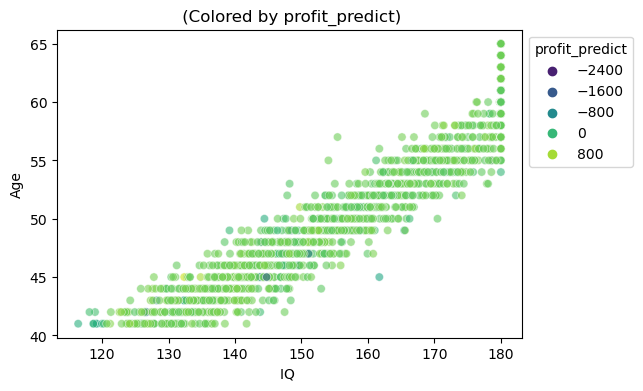

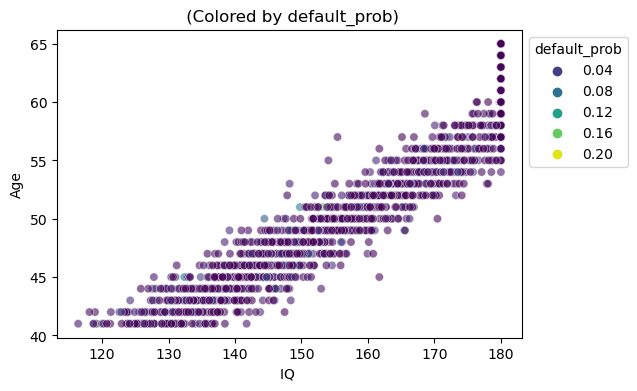

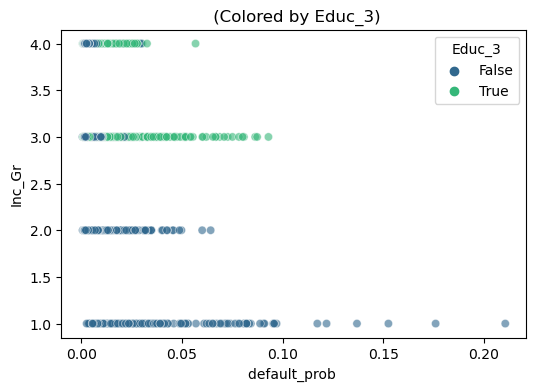

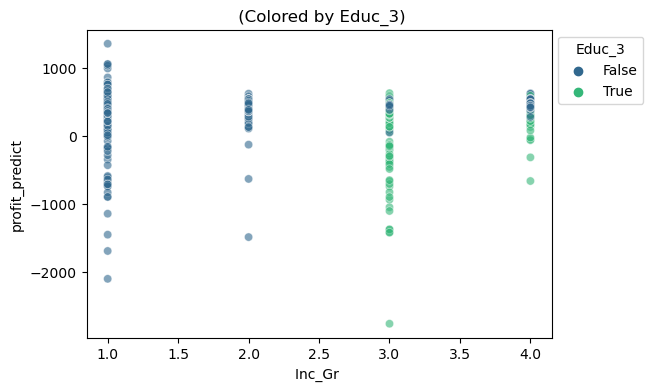

In [119]:
## progress or not with this product?
df_bl_dummies_def_profit_4_grp = df_bl_dummies_def_profit_4.groupby(["Inc_Gr","Housing_3"]).agg({"default_prob":"mean","profit_predict":"mean","Educ_3":"count"}).reset_index()
print("df_bl_dummies_def_profit_4_grp\n",df_bl_dummies_def_profit_4_grp.head(5))

####plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_bl_dummies_def_profit_4, 
    x="IQ", 
    y="Age", 
    hue="profit_predict",  # Color by income category: Inc_Gr
    palette="viridis",  # Choose a color scheme
    alpha=0.6  # Adjust transparency
)
plt.xlabel("IQ ")
plt.ylabel("Age")
plt.title(" (Colored by profit_predict)")
plt.legend(title="profit_predict", bbox_to_anchor=(1, 1))  # Move legend outside
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_bl_dummies_def_profit_4, 
    x="IQ", 
    y="Age", 
    hue="default_prob",  # Color by income category: Inc_Gr
    palette="viridis",  # Choose a color scheme
    alpha=0.6  # Adjust transparency
)
plt.xlabel("IQ ")
plt.ylabel("Age")
plt.title(" (Colored by default_prob)")
plt.legend(title="default_prob", bbox_to_anchor=(1, 1))  # Move legend outside
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_bl_dummies_def_profit_4, 
    x="default_prob", 
    y="Inc_Gr", 
    hue="Educ_3",  # Color by income category: Inc_Gr
    palette="viridis",  # Choose a color scheme
    alpha=0.6  # Adjust transparency
)
plt.xlabel("default_prob ")
plt.ylabel("Inc_Gr")
plt.title(" (Colored by Educ_3)")
plt.legend(title="Educ_3", bbox_to_anchor=(1, 1))  # Move legend outside
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_bl_dummies_def_profit_4, 
    x="Inc_Gr", 
    y="profit_predict", 
    hue="Educ_3",  # Color by income category: Inc_Gr
    palette="viridis",  # Choose a color scheme
    alpha=0.6  # Adjust transparency
)
plt.xlabel("Inc_Gr ")
plt.ylabel("profit_predict")
plt.title(" (Colored by Educ_3)")
plt.legend(title="Educ_3", bbox_to_anchor=(1, 1))  # Move legend outside
plt.show()
###end plot


df_bl_dummies_def_profit_5_agg_default_flg
 default_flg_predict    0
Educ_3                 0
dtype: int64
agg_df_grp
   bckt_profit_predict  AgeJ_cnt  default_flg_predict_sum  profit_predict_sum  \
0                  Q1       391                        0        39661.679688   
1                  Q2       391                        0       157562.250000   
2                  Q3       391                        0       180901.687500   
3                  Q4       391                        0       212641.843750   

   default_prob_mean  
0           0.027414  
1           0.011141  
2           0.008073  
3           0.011884  
quartiles
 0.25    360.518356
0.50    437.244751
0.75    488.165924
Name: profit_predict, dtype: float64


/tmp/ipykernel_112/1645939245.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df_grp = agg_df.groupby("bucket").agg({"Age":"count","default_flg_predict":"sum","profit_predict":"sum","default_prob":"mean"}).reset_index()#,"profit_predict":"min"


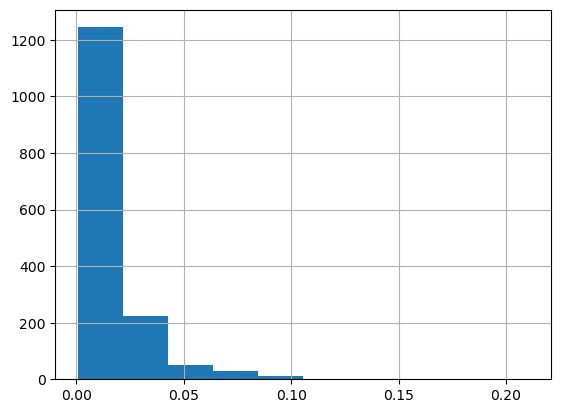

In [123]:
#groupby: Profit_i  Gender  MarStat  Housing  Educ  Inc_Gr  Children
# df_bl_dummies_def_profit_4_grp = df_bl_dummies_def_profit_4.groupby(["Inc_Gr","Housing_3"]).agg({"default_prob":"mean","profit_predict":"mean","Educ_3":"count"}).reset_index()
# print("df_bl_dummies_def_profit_4_grp\n",df_bl_dummies_def_profit_4_grp.head(5))

# # Aggregate by 'category' (sum in this case)
# agg_df = df_bl_dummies_def_profit_4.groupby('profit_predict')['value'].sum().reset_index()

## add default_flg_predict, but it is empty!
df_bl_dummies_def_profit_5 = df_bl_dummies_def_profit_4
df_bl_dummies_def_profit_5["default_flg_predict"] = np.where(df_bl_dummies_def_profit_5["default_prob"] > 0.5,1,0)
df_bl_dummies_def_profit_5["default_prob"].hist()
df_bl_dummies_def_profit_5_agg_default_flg = df_bl_dummies_def_profit_5[df_bl_dummies_def_profit_5["default_flg_predict"]==1].agg({"default_flg_predict":"sum","Educ_3":"count"})
print("df_bl_dummies_def_profit_5_agg_default_flg\n",df_bl_dummies_def_profit_5_agg_default_flg)

# # Create 4 buckets using quartiles
agg_df = df_bl_dummies_def_profit_5
agg_df['bucket'] = pd.qcut(df_bl_dummies_def_profit_5['profit_predict'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
# print("agg_df",agg_df.head(5))
#"Age":"count","Default_flg":"sum","default_prob":"mean"
agg_df_grp = agg_df.groupby("bucket").agg({"Age":"count","default_flg_predict":"sum","profit_predict":"sum","default_prob":"mean"}).reset_index()#,"profit_predict":"min"
agg_df_grp.columns = ["bckt_profit_predict","AgeJ_cnt","default_flg_predict_sum","profit_predict_sum","default_prob_mean"]
print("agg_df_grp\n",agg_df_grp)

# # Calculate quartile values
quartiles = agg_df['profit_predict'].quantile([0.25, 0.5, 0.75])  # Q1, Q2 (median), Q3
# q1, q2, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]
print("quartiles\n",quartiles)
#histogram

# df_bl_dummies_def_profit_4["profit_predict"].hist()
# df_bl_dummies_def_profit_4_grp = df_bl_dummies_def_profit_4.agg({"profit_predict":"sum"}).reset_index()
# print("profit_predict\n",df_bl_dummies_def_profit_4_grp)

In [ ]:
## additional analysis
# # Create 4 buckets using quartiles
agg_df_hist = df_hs_new_for_model_inclProfit_4[df_hs_new_for_model_inclProfit_4["Cost"]==1000]
# agg_df_hist_bucket['bucket'] = pd.qcut(agg_df_hist['Profit_i'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
# print("agg_df",agg_df.head(5))
agg_df_hist_grp = agg_df_hist.groupby(["Cost","Profit_i"]).agg({"Age":"count","Default_flg":"sum","default_prob":"mean"}).reset_index()#,"profit_predict":"min"
agg_df_hist_grp.columns = ["Cost","Profit_i","Age_count","Default_flg_sum","default_prob_mean"]
print("agg_df_grp\n",agg_df_hist_grp)
##end add.analysis